In [595]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2016-new-coder-survey-/2016-FCC-New-Coders-Survey-Data.csv


# Importing dataset

In [596]:
df = pd.read_csv("/kaggle/input/2016-new-coder-survey-/2016-FCC-New-Coders-Survey-Data.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (21,57) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# EDA

In [597]:
df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventBootcamp,CodeEventCoffee,CodeEventConferences,CodeEventDjangoGirls,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWomenCode,CodeEventWorkshop,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,Gender,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDiabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobPref,JobRelocateYesNo,JobRoleInterest,JobRoleInterestOther,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodingBlocks,PodcastDeveloperTea,PodcastDotNetRocks,PodcastHanselminutes,PodcastJSJabber,PodcastJsAir,PodcastNone,PodcastOther,PodcastProgrammingThrowDown,PodcastRubyRogues,PodcastSEDaily,PodcastShopTalk,PodcastTalkPython,PodcastWebAhead,ResourceBlogs,ResourceBooks,ResourceCodeWars,ResourceCodecademy,ResourceCoursera,ResourceDevTips,ResourceEdX,ResourceEggHead,ResourceFCC,ResourceGoogle,ResourceHackerRank,ResourceKhanAcademy,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceReddit,ResourceSkillCrush,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,United States of America,United States of America,office and administrative support,NaN,Employed for wages,NaN,NaN,0.0,male,0.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,30.0,cef35615d61b202f1dc794ef2746df14,48fd66e15301df9727e13e6e80aef941,32000.0,0.0,0.0,0.0,1.0,NaN,freelance,NaN,NaN,NaN,NaN,English,married or domestic partnership,0.0,1.0,2c6f0af42c,2016-03-29 21:24:53,2016-03-29 21:23:13,2016-03-29 21:27:25,2016-03-29 21:24:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,20000.0
1,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,United States of America,United States of America,food and beverage,NaN,Employed for wages,NaN,50000.0,NaN,male,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,323e5a113644d18185c743c241407754,a8cd67193184084b1e32b362225bf280,15000.0,0.0,0.0,0.0,1.0,Within the next 6 months,work for a startup,1.0,Front-End Web Developer,NaN,in an office with other developers,English,NaN,20.0,2.0,d048ac774d,2016-03-29 21:27:09,2016-03-29 21:24:59,2016-03-29 21:29:10,2016-03-29 21:27:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Front-end happy hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"some college credit, no degree",NaN,NaN
2,19.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,United States of America,United States of America,finance,NaN,Employed for wages,NaN,NaN,NaN,male,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,20.0,b29a1027e5cd062e654a63764157461d,129b4479808fe006e768502b957a0c52,48000.0,0.0,0.0,0.0,0.0,NaN,start your own business,NaN,NaN,NaN,NaN,English,NaN,50.0,24.0,241513bbbe,2016-03-29 21:27:11,2016-03-29 21:25:37,2016-03-29 21:28:21,2016-03-29 21:27:13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN

In [598]:
# Col names
col_names = df.columns.values; col_names

array(['Age', 'AttendedBootcamp', 'BootcampFinish',
       'BootcampFullJobAfter', 'BootcampLoanYesNo', 'BootcampMonthsAgo',
       'BootcampName', 'BootcampPostSalary', 'BootcampRecommend',
       'ChildrenNumber', 'CityPopulation', 'CodeEventBootcamp',
       'CodeEventCoffee', 'CodeEventConferences', 'CodeEventDjangoGirls',
       'CodeEventGameJam', 'CodeEventGirlDev', 'CodeEventHackathons',
       'CodeEventMeetup', 'CodeEventNodeSchool', 'CodeEventNone',
       'CodeEventOther', 'CodeEventRailsBridge', 'CodeEventRailsGirls',
       'CodeEventStartUpWknd', 'CodeEventWomenCode', 'CodeEventWorkshop',
       'CommuteTime', 'CountryCitizen', 'CountryLive', 'EmploymentField',
       'EmploymentFieldOther', 'EmploymentStatus',
       'EmploymentStatusOther', 'ExpectedEarning',
       'FinanciallySupporting', 'Gender', 'HasChildren', 'HasDebt',
       'HasFinancialDependents', 'HasHighSpdInternet', 'HasHomeMortgage',
       'HasServedInMilitary', 'HasStudentDebt', 'HomeMortgageOwe',
    

In [599]:
# Shape of df
df.shape

(15620, 113)

In [600]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15620 entries, 0 to 15619
Columns: 113 entries, Age to StudentDebtOwe
dtypes: float64(85), object(28)
memory usage: 13.5+ MB


In [601]:
# Checking for null vals in each column
df.isnull().sum()

Age                      2007
AttendedBootcamp          240
BootcampFinish          14687
BootcampFullJobAfter    14985
BootcampLoanYesNo       14686
                        ...  
ResourceW3Schools       15499
ResourceYouTube         15499
SchoolDegree             1941
SchoolMajor              7170
StudentDebtOwe          12106
Length: 113, dtype: int64

In [602]:
# Querying column names where NaNs exist
nan_cols = df.columns[df.isna().any()].tolist(); nan_cols

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampFullJobAfter',
 'BootcampLoanYesNo',
 'BootcampMonthsAgo',
 'BootcampName',
 'BootcampPostSalary',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventBootcamp',
 'CodeEventCoffee',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWomenCode',
 'CodeEventWorkshop',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'Gender',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.y',
 'Income',
 'IsEthnicMinority',
 'IsR

In [603]:
# Length of NaN cols
len(nan_cols)

109

In [604]:
# Checking for any duplicate rows
df.duplicated().sum()

0

In [605]:
# summary descrptn
summary = df.describe(); summary

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampPostSalary,BootcampRecommend,ChildrenNumber,CodeEventBootcamp,CodeEventCoffee,CodeEventConferences,CodeEventDjangoGirls,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWomenCode,CodeEventWorkshop,CommuteTime,ExpectedEarning,FinanciallySupporting,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,Income,IsEthnicMinority,IsReceiveDiabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobRelocateYesNo,MoneyForLearning,MonthsProgramming,PodcastChangeLog,PodcastCodeNewbie,PodcastCodingBlocks,PodcastDeveloperTea,PodcastDotNetRocks,PodcastHanselminutes,PodcastJSJabber,PodcastJsAir,PodcastNone,PodcastProgrammingThrowDown,PodcastRubyRogues,PodcastSEDaily,PodcastShopTalk,PodcastTalkPython,PodcastWebAhead,ResourceBlogs,ResourceBooks,ResourceCodeWars,ResourceCodecademy,ResourceCoursera,ResourceDevTips,ResourceEdX,ResourceEggHead,ResourceFCC,ResourceGoogle,ResourceHackerRank,ResourceKhanAcademy,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourcePluralSight,ResourceReddit,ResourceSkillCrush,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,StudentDebtOwe
count,13613.000000,15380.000000,933.000000,635.000000,934.000000,631.000000,330.000000,937.000000,2554.000000,42.0,2077.0,2898.0,18.0,22.0,558.0,2422.0,313.0,480.0,8900.0,255.0,14.0,743.0,711.0,23.0,8339.000000,6077.000000,3996.000000,4012.000000,13610.000000,13640.000000,13625.000000,6371.000000,13550.000000,6371.000000,1.501000e+03,14942.000000,7329.000000,13645.000000,13530.000000,15537.000000,8645.000000,5487.000000,14679.000000,15014.000000,583.0,1878.0,16.0,80.0,18.0,19.0,1356.0,29.0,11040.0,34.0,79.0,775.0,83.0,41.0,15.0,30.0,144.0,1563.0,9586.0,4844.0,968.0,3472.0,29.0,10937.0,55.0,30.0,3746.0,150.0,26.0,1687.0,3565.0,29.0,36.0,30.0,191.0,422.0,3306.0,4130.0,121.0,121.0,3514.000000
mean,29.175421,0.061964,0.689175,0.584252,0.332976,9.055468,63740.506061,0.785486,1.896241,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,55.304473,53717.586967,0.196697,0.642822,0.470683,0.295528,0.879339,0.280176,0.076236,0.589546,1.897040e+05,15.323317,44930.010506,0.238402,0.022912,0.276952,0.421747,0.735557,1108.010559,24.430198,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,34556.143711
std,9.017716,0.241097,0.463080,0.493239,0.471531,12.968035,26347.200265,0.410704,1.115975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.442833,30078.511957,0.397551,0.479228,0.499158,0.456296,0.325744,0.449120,0.265385,0.491955,4.547212e+05,14.274867,35582.783216,0.426122,0.149629,0.447507,0.493867,0.441076,4860.825612,49.426744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54423.139781
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6000.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,6000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,6000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
25%,23.000000,0.000000,0.000000,0.000000,0.000000,3.000000,50000.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,15.000000,35000.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7.200000e+04,5.000000,20000.000000,0.000000,0.000000,0.00000

In [606]:
# Learners with a full time offer post completing bootcamp
BootcampFullJobAfter = len(df[df['BootcampFullJobAfter'] == 1])

# Learners without a full time offer post completing bootcamp
BootcampWithoutFullJobAfter = len(df[df['BootcampFullJobAfter'] == 0])

print(f"Learners with a full time offer post completing bootcamp: {BootcampFullJobAfter}")
print(f"Learners without a full time offer post completing bootcamp: {BootcampWithoutFullJobAfter}")

Learners with a full time offer post completing bootcamp: 371
Learners without a full time offer post completing bootcamp: 264


In [607]:
# Number of learners who tried for a full time opportunity
n_learners = BootcampFullJobAfter + BootcampWithoutFullJobAfter
print(f"Number of learners who tried for a full time opportunity: {n_learners}")

Number of learners who tried for a full time opportunity: 635


In [608]:
# Learners per country
d = df.groupby("CountryLive").count().Age.sort_values(ascending=False)

# Age distribution of learners

- The histogram is positively skewed.
- Implying that most learners are young. 
- There seem to be some outlier cases where the learners are older. 
- Median age of learners is somewhere around 25 & 30. 

<AxesSubplot:xlabel='Age', ylabel='Count'>

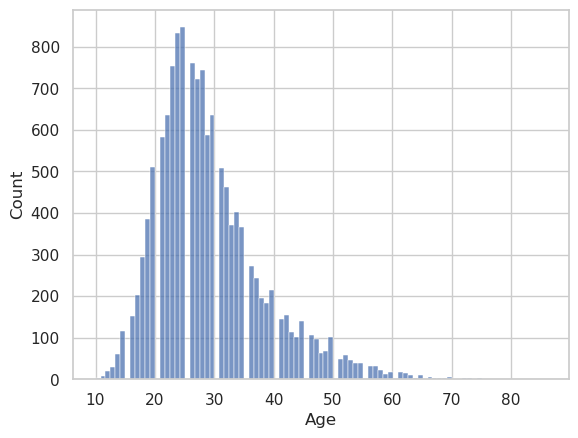

In [609]:
sns.histplot(x="Age", data=df)

<AxesSubplot:>

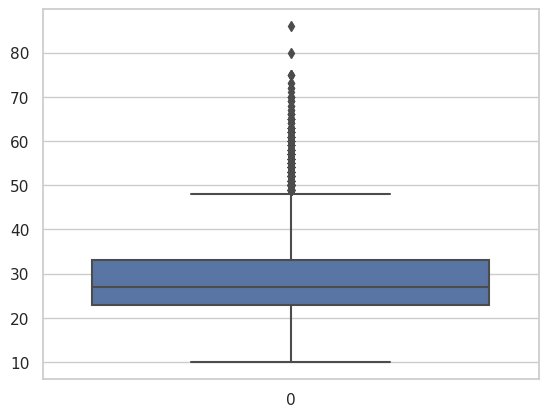

In [610]:
sns.boxplot(df["Age"])

# Gender - Age distribution
- Majority of the learners are male. 
- Female learners form a significant proportion of the learner base. 
- Members of the LGBTQIA+ community form an insignificant proportion of the learner base. 
- In every age group, there are more males than females. 

In [611]:
# Checking for total unique values
nunique_gender= df["Gender"].nunique(); nunique_gender

5

In [612]:
# Gender frequency dist
df.Gender.value_counts()

male           10766
female          2840
genderqueer       66
agender           38
trans             36
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Count'>

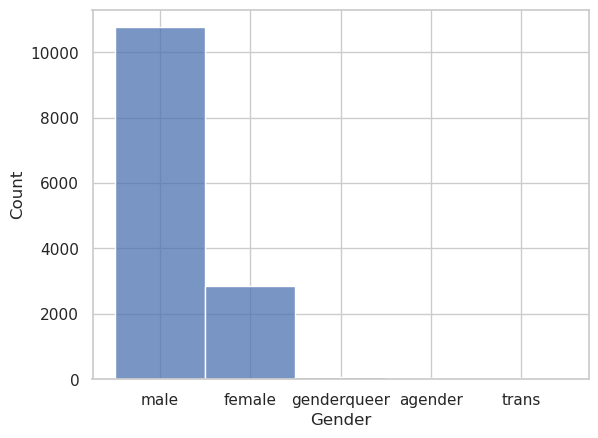

In [613]:
# Representation of genders
sns.histplot(x=gender, data=df)

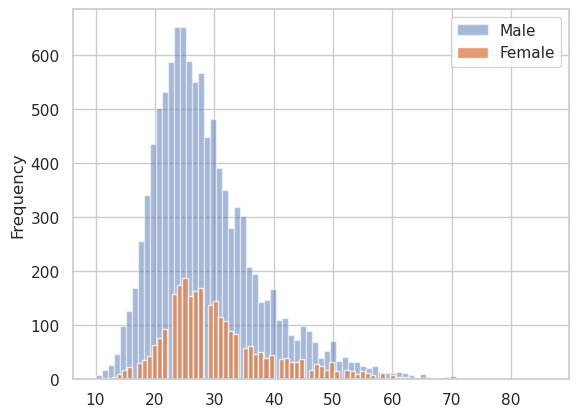

In [614]:
# Age distribution of the learners - Male vs female
fig, ax = plt.subplots()
df[df.Gender == 'male'].Age.plot.hist(bins=75, ax=ax, alpha=0.5)
df[df.Gender == 'female'].Age.plot.hist(bins=75, ax=ax, alpha=0.8)
legend = ax.legend(['Male', 'Female'])

# Income distribution ~ Gender
- Income distribution of males and females is almost the same. 
- Although, there seem to be more men than women whose earnings are around $200k. 

In [615]:
income = df.Income

# Range - income distribution
min_income = income.min()
max_income = income.max()

<AxesSubplot:xlabel='Income', ylabel='Density'>

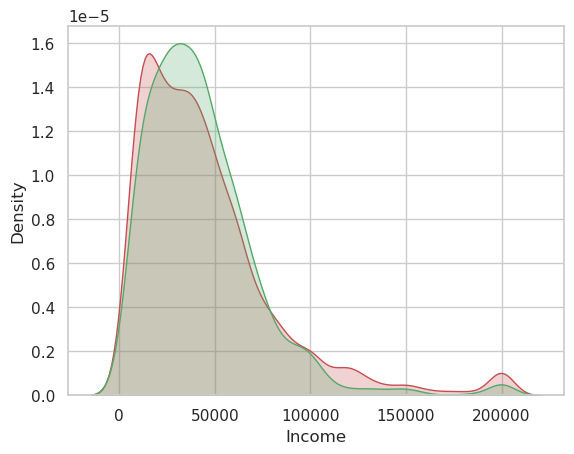

In [616]:
sns.kdeplot(inc_m, fill=True, color="r")
sns.kdeplot(inc_f, fill=True, color="g")

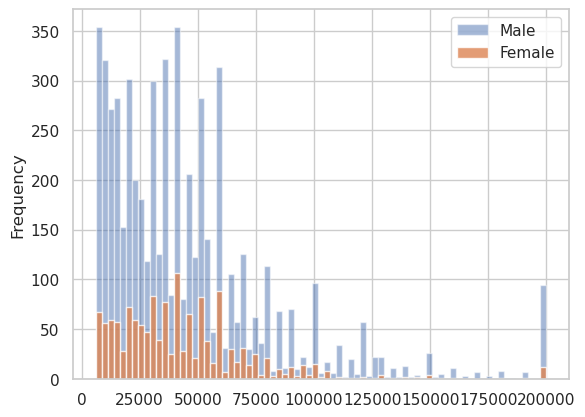

In [617]:
# Income distribution - Male vs female
fig, ax = plt.subplots()
df[df.Gender == 'male'].Income.plot.hist(bins=75, ax=ax, alpha=0.5)
df[df.Gender == 'female'].Income.plot.hist(bins=75, ax=ax, alpha=0.8)
legend = ax.legend(['Male', 'Female'])

# Expected value for money invested
- High earnings expected at minimal spending on learning. 

<AxesSubplot:xlabel='MoneyForLearning', ylabel='ExpectedEarning'>

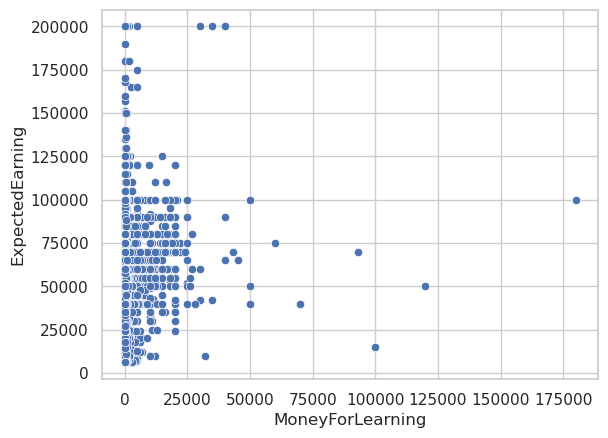

In [618]:
sns.scatterplot(x="MoneyForLearning" , y="ExpectedEarning", data=df)

# Salary expectation vs number of learners
- Most learners expect around $50k - $70k

<AxesSubplot:>

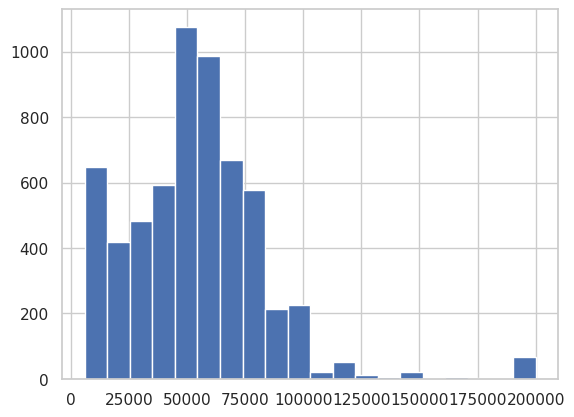

In [619]:
mean_expectation = df['ExpectedEarning'].mean()
df['ExpectedEarning'].hist(bins= 20)

# Pairplot: Age vs Income vs Expected earnings ~ Gender

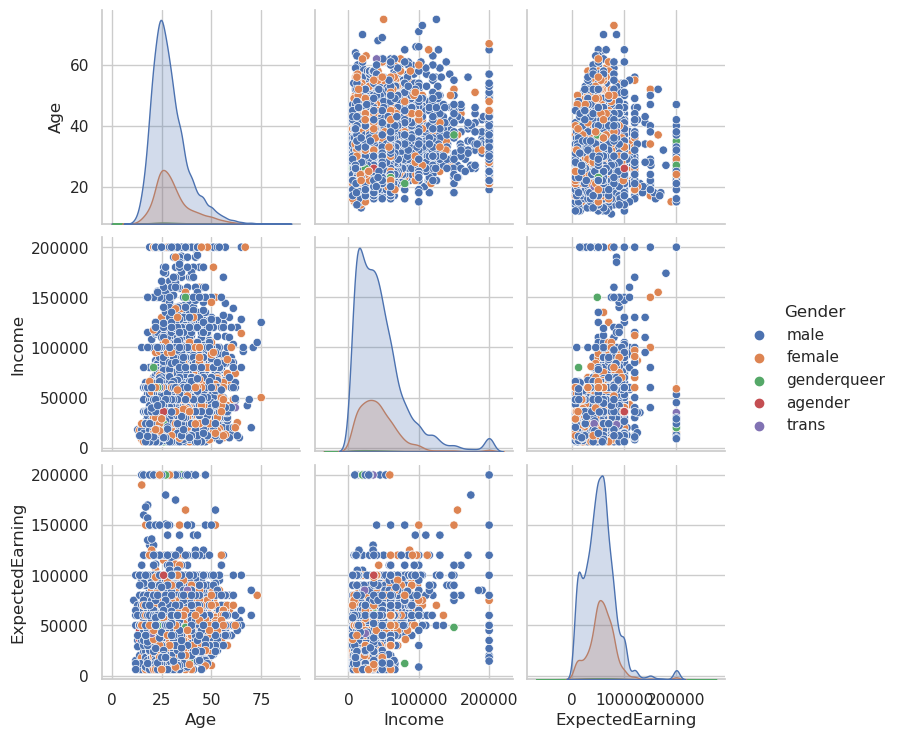

In [620]:
vars = ["Age", "Income", "ExpectedEarning"]

sns.pairplot(df, vars=vars, hue="Gender")
plt.show()

# Bootcamp popularity

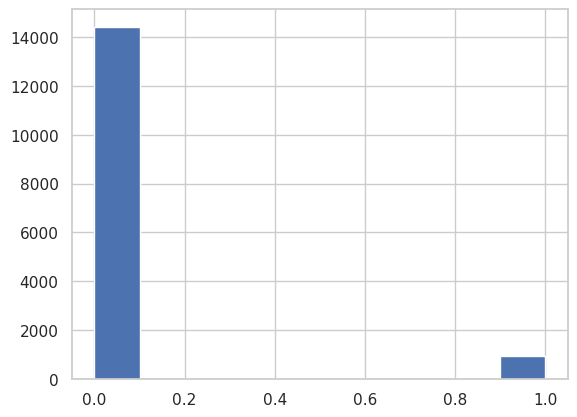

In [621]:
# Distribution of learners who attended a bootcamp vs learners who did not
df['AttendedBootcamp'].hist()
plt.show()

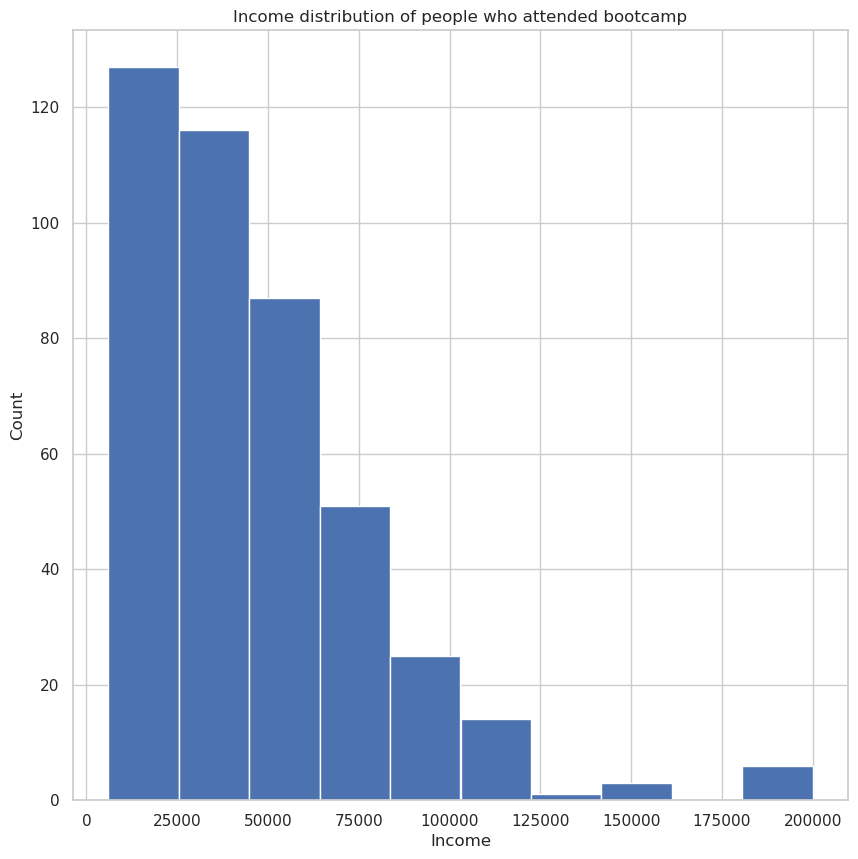

In [622]:
# Income distribution of people who attended bootcamp
attended = df[df['AttendedBootcamp']== 1.0]
attended.hist(column= "Income", figsize=(10, 10))
plt.xlabel("Income")
plt.ylabel("Count")
plt.title("Income distribution of people who attended bootcamp")
plt.show()

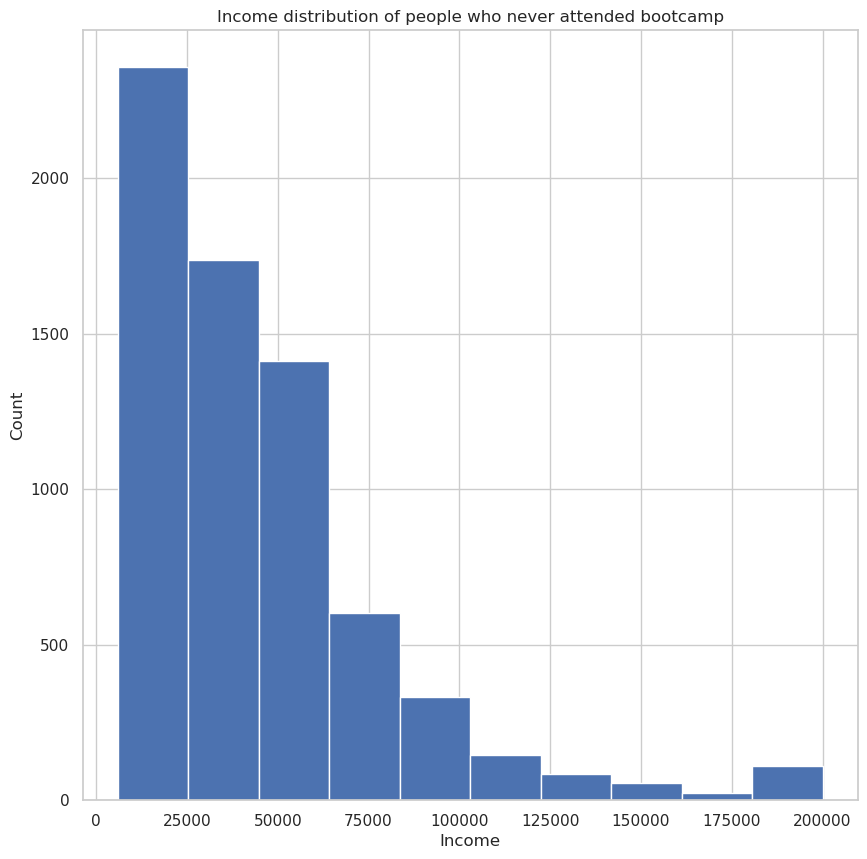

In [623]:
# Income distribution of people who never attended bootcamp
attended = df[df['AttendedBootcamp']== 0]
attended.hist(column= "Income", figsize=(10, 10))
plt.xlabel("Income")
plt.ylabel("Count")
plt.title("Income distribution of people who never attended bootcamp")
plt.show()

# Most popular learning source
- Free Code Camp and Codecademy are 2 most popular choices.

<AxesSubplot:>

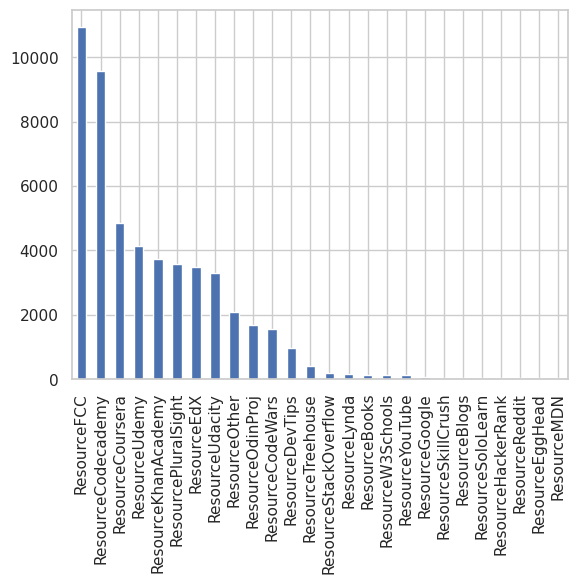

In [624]:
# Fetching all resources
resources = [col for col in df.columns if col.startswith('Resource')]

# count
resources_cnt = df[resources].count()

# Sort & plot
resources_cnt.sort_values(ascending= False).plot.bar()

# Work environment preference
- Most learners would prefer to work in an office environment. 

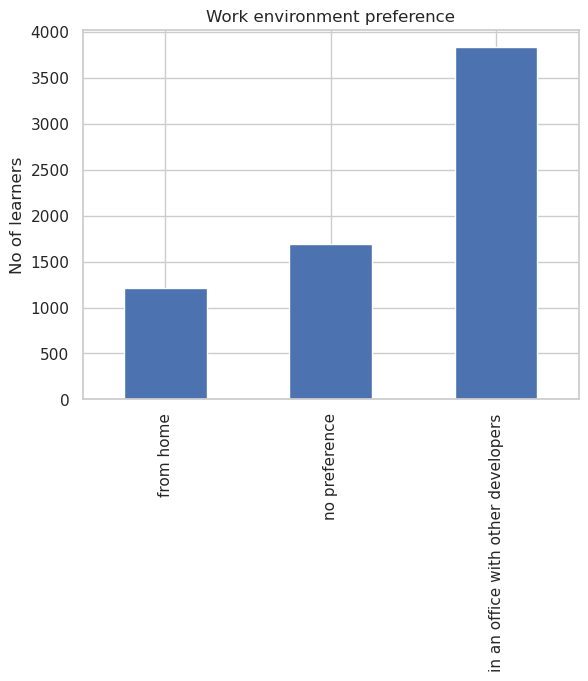

In [625]:
job_loc_pref = df['JobWherePref'].value_counts(ascending= True)
job_loc_pref.plot(kind='bar')
plt.ylabel("No of learners")
plt.title("Work environment preference")
plt.show()

# Job role popularity
- Most learners are interested in Full Stack Dev. 

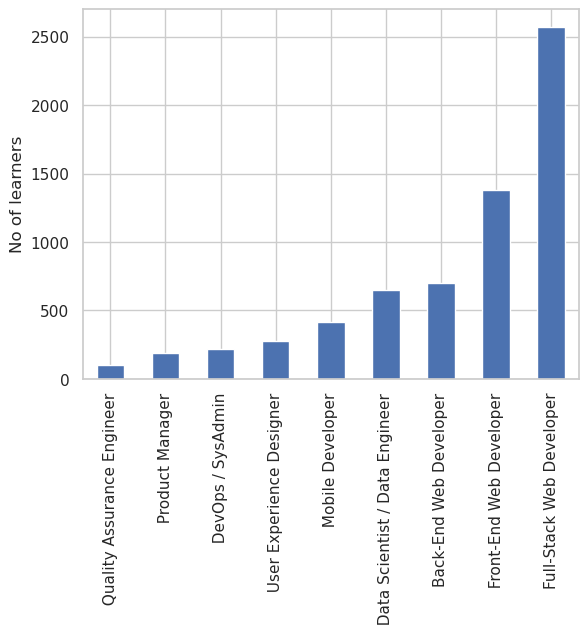

In [626]:
job_role = df['JobRoleInterest']
jr_cnt = job_role.value_counts(ascending= True)
jr_cnt.plot(kind='bar')
plt.ylabel("No of learners")
plt.show()

# Level of education of learners
- Learners with a bachelor's degree, form a major proportion of the learner base.

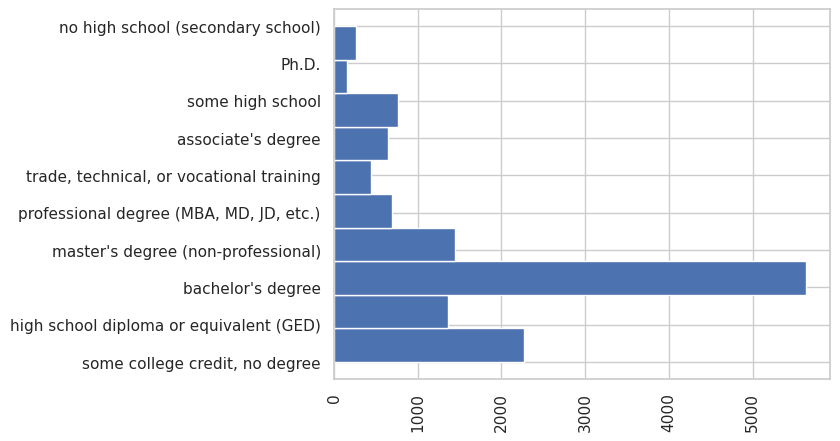

In [627]:
df.SchoolDegree.astype('category').hist(orientation='horizontal')
plt.xticks(rotation=90)
plt.show()

# Income vs Type of education
- Seems like having some sort of formal education helps boost income.
- Less than 20 learners with no formal education earn > 25k.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:428: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


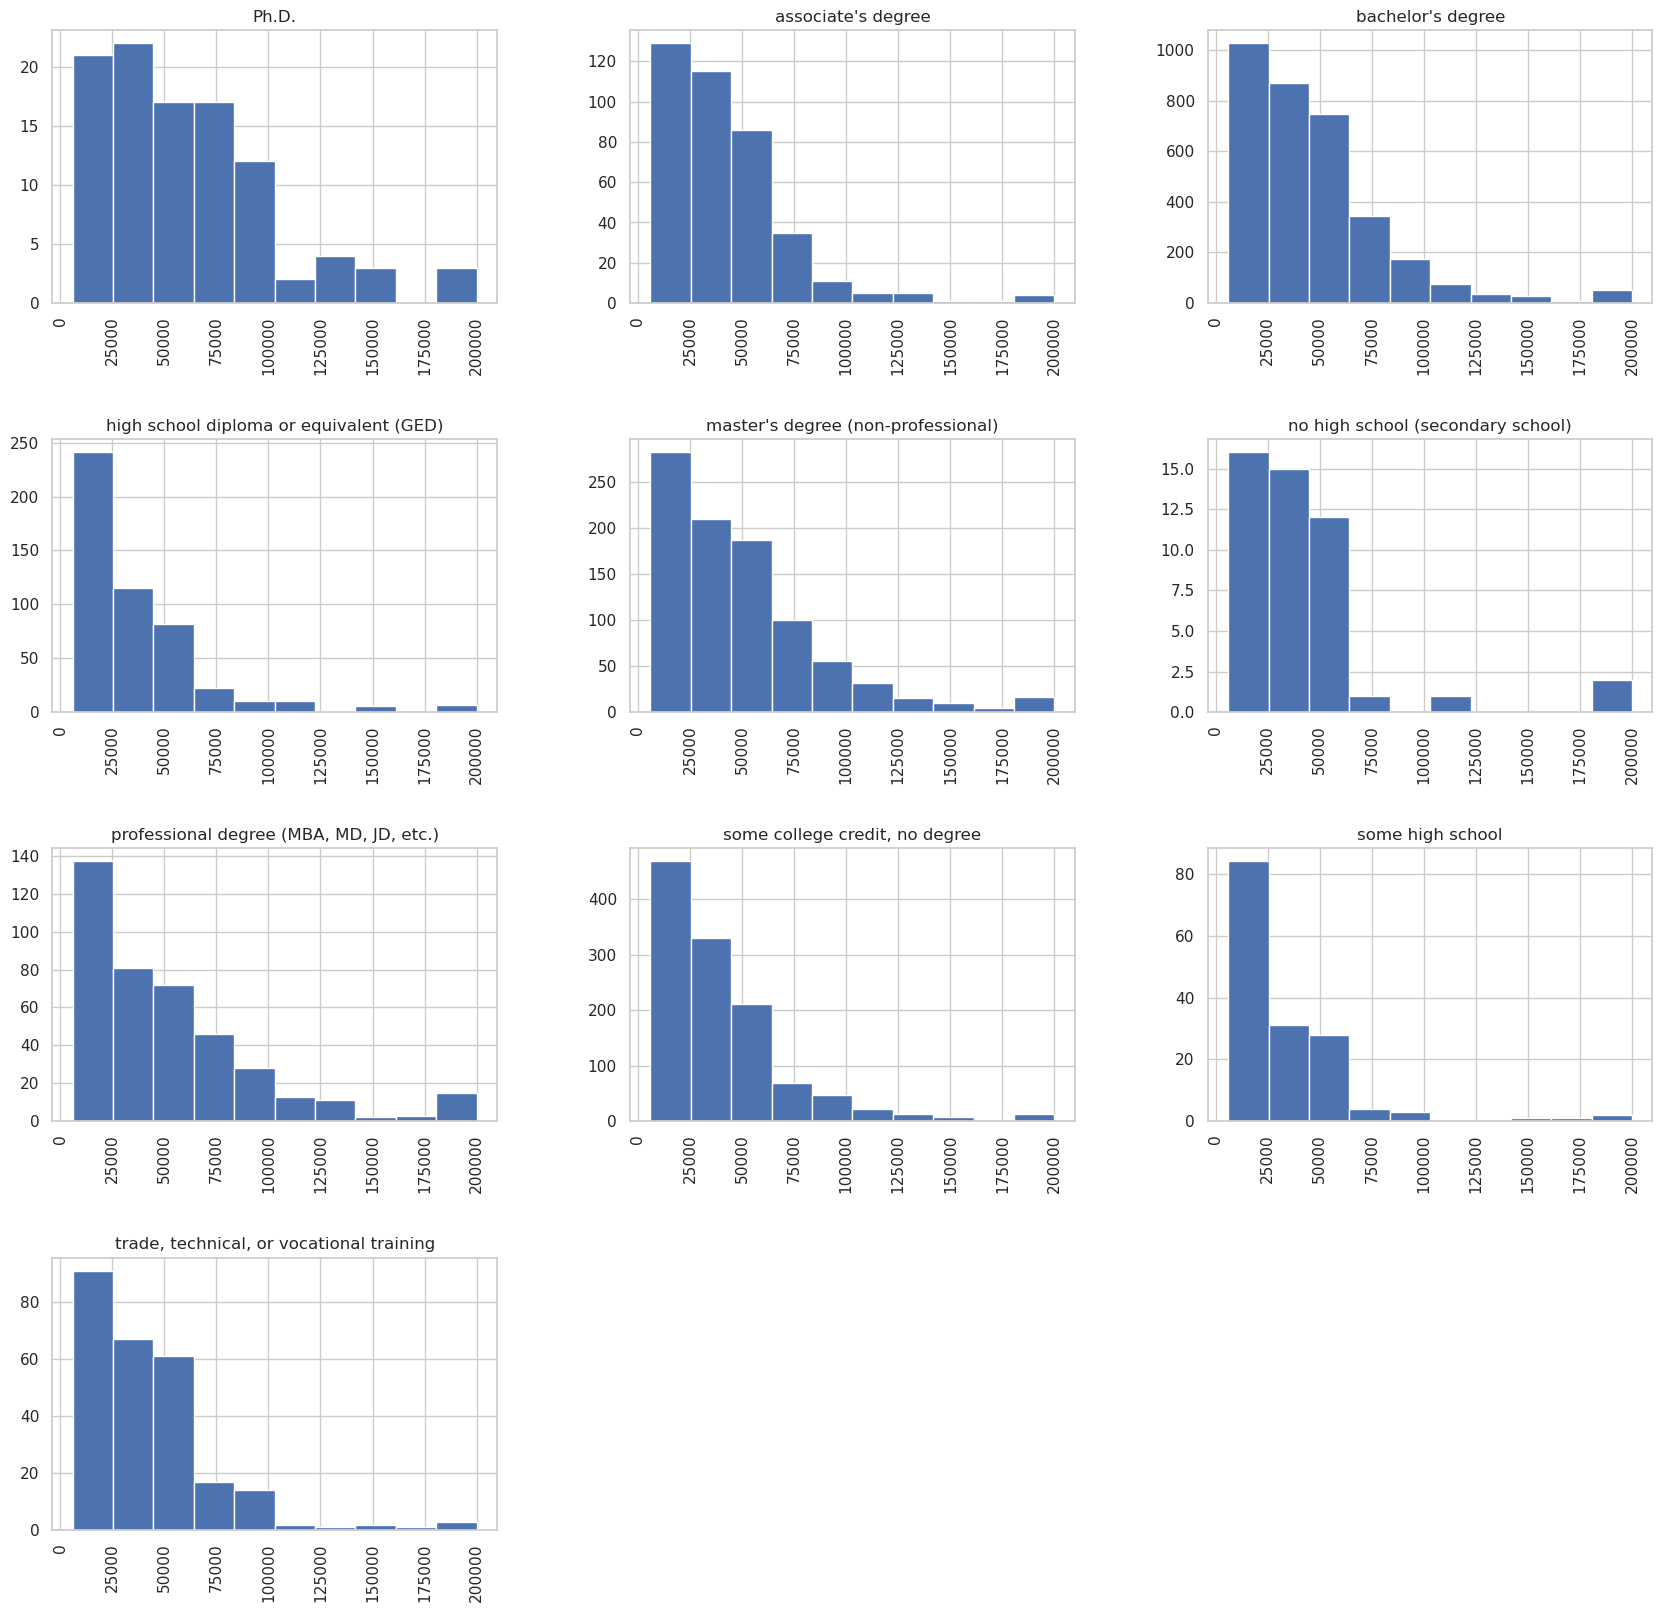

In [628]:
fig, axs = plt.subplots(figsize=(20,20))
df.hist(by='SchoolDegree', column='Income', ax=axs)
plt.show()

# Programming experience
- Most people have < 100 months of coding experience.

<AxesSubplot:>

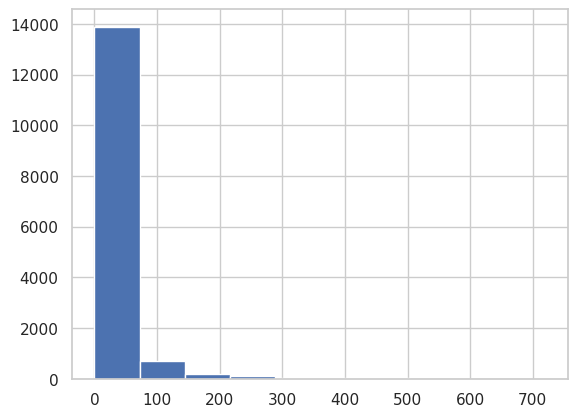

In [629]:
df['MonthsProgramming'].hist()